<a href="https://colab.research.google.com/github/ekaratnida/Automated_Tools-/blob/main/Module3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from google.colab import auth
import os
import pandas as pd
import sqlite3 as sql

auth.authenticate_user()
os.chdir('/content/dataset/')

In [9]:
df = pd.read_csv('Supermarket.csv')
df.head()
conn = sql.connect("supermarket.db")
df.to_sql("table1", conn, if_exists='replace')

In [10]:
sql_string = "select * from table1"
df = pd.read_sql(sql_string, conn)
df.head()

,index,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,0,200812,20080516,6,9,1,0.01,PRD0902611,CL00241,DEP00086,G00028,D00008,CUST0000767429,XX,OT,994111000667718,S,MM,Small Shop,Grocery,STORE01026,SS,N01
1,1,200646,20070108,2,16,1,1.61,PRD0901483,CL00236,DEP00084,G00028,D00008,CUST0000419057,XX,PE,994104000413959,M,UM,Top Up,Fresh,STORE01300,LS,S03
2,2,200812,20080518,1,15,3,0.03,PRD0900841,CL00212,DEP00070,G00022,D00005,CUST0000714492,XX,OA,994111000633261,M,LA,Small Shop,Nonfood,STORE00343,XLS,W02
3,3,200632,20061005,5,10,1,1.11,PRD0904263,CL00248,DEP00089,G00030,D00009,CUST0000356307,XX,OA,994102600389888,S,MM,Small Shop,Grocery,STORE01007,XLS,W01
4,4,200707,20070415,1,8,23,0.23,PRD0902611,CL00241,DEP00086,G00028,D00008,CUST0000058615,XX,OT,994105300205367,L,MM,Top Up,Grocery,STORE01794,LS,W01


In [33]:
sql ='''
SELECT CUST_CODE, 
COUNT(DISTINCT BASKET_ID)/COUNT(DISTINCT SHOP_WEEK) AS VISIT_PER_WEEK,
COUNT(DISTINCT SHOP_WEEK) AS TOTAL_WEEK,
COUNT(DISTINCT PROD_CODE) AS TOTAL_PRODUCT,
SUM(SPEND) AS TOTAL_SALES
FROM table1
WHERE CUST_CODE IS NOT NULL GROUP BY CUST_CODE
HAVING TOTAL_SALES < 4000
'''

df = pd.read_sql(sql, conn)
print(df[0:3])

        CUST_CODE  VISIT_PER_WEEK  TOTAL_WEEK  TOTAL_PRODUCT  TOTAL_SALES
0  CUST0000003603               1           4              8         9.68
1  CUST0000007540               1           1              4         9.72
2  CUST0000007634               1           2              3         3.27


In [32]:
sql2 = '''select * from table1 where cust_code = "CUST0000003603"'''
df2 = pd.read_sql(sql2, conn)
df2

,index,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,551,200744,20071225,3,13,1,1.02,PRD0904887,CL00041,DEP00011,G00004,D00002,CUST0000003603,XX,PE,994109000128099,M,LA,Small Shop,Fresh,STORE01367,MS,E03
1,1031,200744,20071225,3,13,1,0.90,PRD0900295,CL00083,DEP00023,G00007,D00002,CUST0000003603,XX,PE,994109000128099,M,LA,Small Shop,Fresh,STORE01367,MS,E03
2,1079,200801,20080228,5,10,6,3.30,PRD0904940,CL00101,DEP00034,G00010,D00003,CUST0000003603,XX,PE,994109900162061,M,LA,Small Shop,Grocery,STORE01367,MS,E03
3,1188,200744,20071225,3,13,1,0.57,PRD0903590,CL00139,DEP00048,G00013,D00003,CUST0000003603,XX,PE,994109000128099,M,LA,Small Shop,Fresh,STORE01367,MS,E03
4,1282,200736,20071030,3,18,1,0.33,PRD0901329,CL00154,DEP00052,G00015,D00003,CUST0000003603,XX,PE,994108200172659,M,MM,Small Shop,Mixed,STORE01367,MS,E03
5,1335,200736,20071030,3,18,1,1.09,PRD0904952,CL00150,DEP00052,G00015,D00003,CUST0000003603,XX,PE,994108200172659,M,MM,Small Shop,Mixed,STORE01367,MS,E03
6,1500,200749,20080201,6,12,1,1.54,PRD0904496,CL00196,DEP00067,G00021,D00005,CUST0000003603,XX,PE,994109500162824,S,UM,Small Shop,Nonfood,STORE00241,MS,E01
7,1573,200749,20080201,6,12,1,0.93,PRD0904213,CL00198,DEP00067,G00021,D00005,CUST0000003603,XX,PE,994109500162824,S,UM,Small Shop,Nonfood,STORE00241,MS,E01


In [12]:
x = df.iloc[:,1:-1]
x.head(5)

,VISIT_PER_WEEK,TOTAL_WEEK,TOTAL_PRODUCT
0,1,4,8
1,1,1,4
2,1,2,3
3,1,1,1
4,1,1,1


In [13]:
y = df.iloc[:,-1:]
y.head(5)

,TOTAL_SALES
0,9.68
1,9.72
2,3.27
3,2.76
4,5.52


In [14]:
import statsmodels.api as sm
x = sm.add_constant(x)
print(x)

     const  VISIT_PER_WEEK  TOTAL_WEEK  TOTAL_PRODUCT
0      1.0               1           4              8
1      1.0               1           1              4
2      1.0               1           2              3
3      1.0               1           1              1
4      1.0               1           1              1
..     ...             ...         ...            ...
551    1.0               1           1              1
552    1.0               1           1              1
553    1.0               1           1              2
554    1.0               1           1              1
555    1.0               1           7              8

[556 rows x 4 columns]


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [16]:
import statsmodels.api as sm

train_result = sm.OLS(y_train, x_train).fit()
train_result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTAL_SALES   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     14.30
Date:                Thu, 13 May 2021   Prob (F-statistic):           6.60e-09
Time:                        03:26:18   Log-Likelihood:                -1868.9
No. Observations:                 444   AIC:                             3746.
Df Residuals:                     440   BIC:                             3762.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1352      4.351      0.720      0.472      -5.417      11.687
VISIT_PER_WEEK    -3.3665      4.102     -0.821      0.412     -11.428       4.695
TOTAL_WEEK         0.8323      0.740      1.124      0.261      -0.623       2.287
TOTAL_PRODUCT      2.2338      0.523      4.275      0.000       1.207       3.261
==============================================================================
Omnibus:                      727.285   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197926.127
Skew:                           9.527   Prob(JB):                         0.00
Kurtosis:                     104.664   Cond. No.                         31.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
train_result.params

const             3.135161
VISIT_PER_WEEK   -3.366488
TOTAL_WEEK        0.832250
TOTAL_PRODUCT     2.233849
dtype: float64

In [19]:
train_result.predict([1, 1, 3, 50])

array([113.95787564])

In [41]:
#train_result.predict([1, 1, 3, 5])
y_pred = train_result.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 39.56


In [48]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_pred1 = reg.predict(x_test)
print('Mean squared error: %.2f'
  % mean_squared_error(y_test, y_pred1))

[[ 0.         -3.36648819  0.83225007  2.23384906]]
[3.13516067]
Mean squared error: 39.56


In [54]:
import sys
import io
import matplotlib.pyplot as plt
import numpy as np

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 35.91


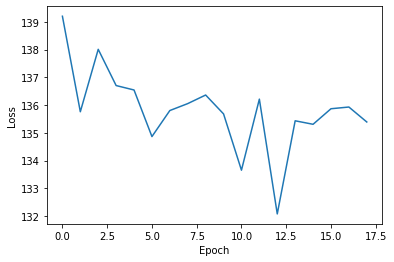

In [64]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(verbose=1,max_iter=3000,tol=0.00001)
with DisplayLossCurve():
  reg.fit(x_train, y_train)

y_pred2 = reg.predict(x_test)
print('Mean squared error: %.2f'
  % mean_squared_error(y_test, y_pred2))

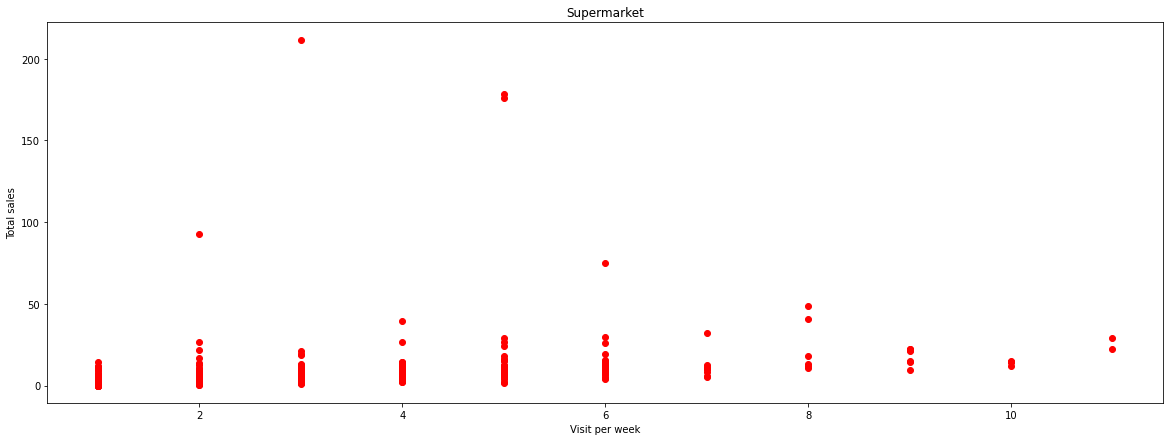

In [194]:
import matplotlib.pyplot as plt
import numpy as np

#print(x_train.iloc[:,3])
#print(y_train.shape)
plt.figure(figsize=(20,7))
plt.scatter(x_train.iloc[:,3], y_train, color = 'red')
#plt.plot(x_train.iloc[:,1:2], np.reshape(train_result.predict([1, 2, 5, 50]),(-1,1)), color = 'blue')
plt.title('Supermarket')
plt.xlabel('Visit per week')
plt.ylabel('Total sales')
plt.show()